In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('C:/Users/Alia/2. The_Rolling_Scopes/train.csv')

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [82]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [83]:
pd.isna(df).sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Очищаем данные от пустых значений

In [84]:
df = df[pd.isna(df).sum(axis=1) == 0]

In [85]:
pd.isna(df).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Выделяем первые символы фамилий и кают в отдельные строки

In [87]:
df['First_Letter_Name'] = df['Name'].str[0]
df['First_Letter_Cabin'] = df['Cabin'].str[0]

Text(0.5, 0, 'Пол')

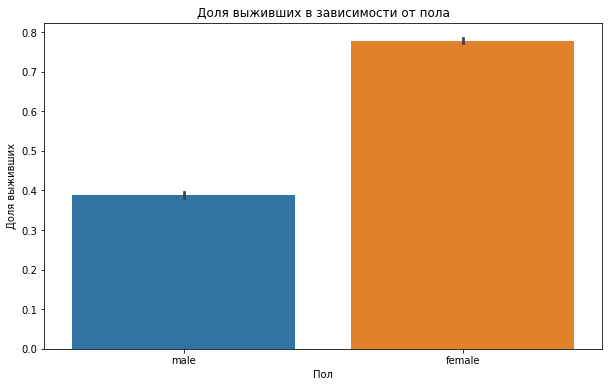

In [89]:
plt.figure(figsize=(10,6))
plt.title("Доля выживших в зависимости от пола")
sns.barplot(x=df['Sex'], y=df['Survived'])
plt.ylabel("Доля выживших")
plt.xlabel("Пол")

Из графика видно, что доля выживших среди женщин почти в два раза больше, чем среди мужчин.

Text(0.5, 0, 'Класс')

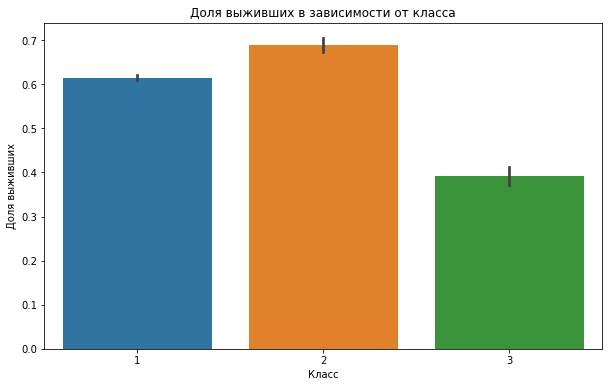

In [93]:
plt.figure(figsize=(10,6))
plt.title("Доля выживших в зависимости от класса")
sns.barplot(x=df['Pclass'], y=df['Survived'])
plt.ylabel("Доля выживших")
plt.xlabel("Класс")

Среди пассажиров третьего класса наименьшее число выживших

Text(0.5, 0, 'Класс')

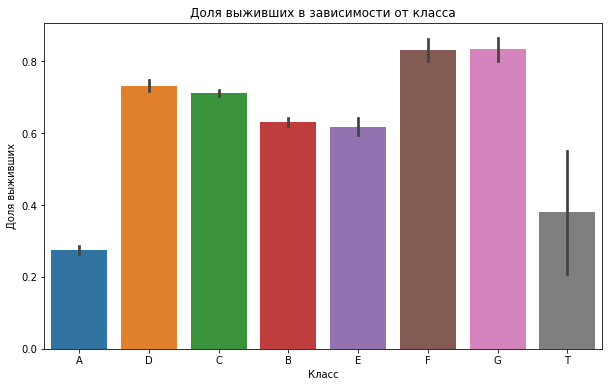

In [101]:
plt.figure(figsize=(10,6))
plt.title("Доля выживших в зависимости от класса")
sns.barplot(x=df['First_Letter_Cabin'], y=df['Survived'])
plt.ylabel("Доля выживших")
plt.xlabel("Класс")

Выживших с палубы А почти в три раза меньше, чем с палуб F и G.

Text(0.5, 0, 'Возраст')

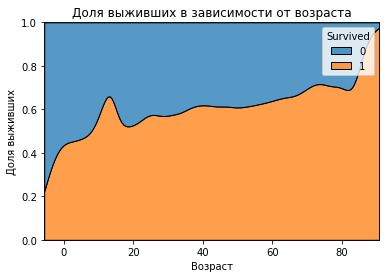

In [122]:
sns.kdeplot(data=df, x="Age", hue="Survived", multiple="fill")
plt.title("Доля выживших в зависимости от возраста")
plt.ylabel("Доля выживших")
plt.xlabel("Возраст")

Вероятность выжить прямопропорциональна возрасту

Text(0.5, 0, 'Количество родственников')

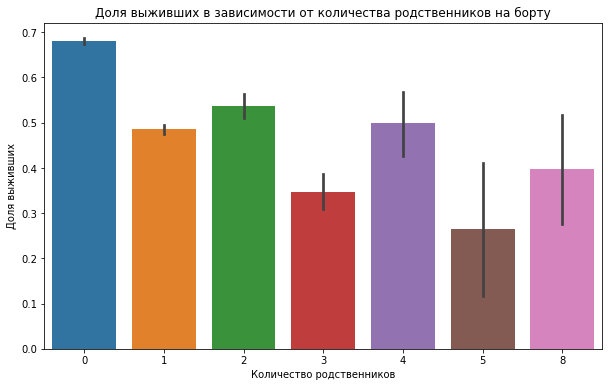

In [127]:
plt.figure(figsize=(10,6))
plt.title("Доля выживших в зависимости от количества родственников на борту")
sns.barplot(x=df['SibSp'], y=df['Survived'])
plt.ylabel("Доля выживших")
plt.xlabel("Количество родственников")

Людям без родственников спастись было значительно проще

Таким образом, наибольшие шансы вижить имели одинокие женщины пожилого возраста из кают первого и второго класса.